# Data Preprocessing and Feature Engineering

## Data Vectorization

The data going into a neural network should be in the form of a tensor of float values, generally. For instance, the data that was integer vectors of text representations was converted into tensor form by encoding.

## Value Normalization

It is not good to feed data into a network that is very heterogeneous, where the value ranges differ greatly from feature to feature. This should be handled by adjusting each feature to zero mean, unity standard deviation. These adjustments should also be applied to the test set, but with the values computed from the training set. You should not compute the mean and standard deviation of the test set.

## Regularization Techniques

The simplest form of regularization is adjusting the model's capacity (number of tunable parameters) through adjustments to the size of the model. The general workflow is to start with a relatively small network, and increase in size until diminishing returns are reached. Let's attempt this with the IMDB dataset.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
imdb_data = np.load('imdb.npz', allow_pickle=True)

In [3]:
for key in imdb_data.keys():
    print(key)

x_test
x_train
y_train
y_test


Great... this dataset is already split out into training and test data. I will want to reserve some of the training data for validation.

In [4]:
imdb_xtrain_full = imdb_data['x_train']
imdb_ytrain_full = imdb_data['y_train']
imdb_xtest = imdb_data['x_test']
imdb_ytest = imdb_data['y_test']

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 # puts a 1 in the integer location of the vector of zeros 
    return results

In [6]:
from sklearn.model_selection import train_test_split

Let's also filter the data to keep only the top 10,000 words.

In [7]:
def filtered_data(data):
    data_filtered = []
    for i in range(len(data)):
        data_instance = np.asarray(data[i])
        data_filt = data_instance[data_instance<10000]
        data_filtered.append(data_filt)
    return data_filtered

In [8]:
imdb_xtrain_filt = filtered_data(imdb_xtrain_full)

In [9]:
max([max(sequence) for sequence in imdb_xtrain_filt[:1000]])

9999

In [10]:
imdb_xtest = filtered_data(imdb_xtest)

The labels are binary, and so we just need to convert them to float arrays. No need to one-hot encode because values of 0 and 1 won't bias the network.

In [11]:
imdb_ytrain_full[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
imdb_ytrain_full = np.asarray(imdb_ytrain_full).astype('float32')
imdb_ytest = np.asarray(imdb_ytest).astype('float32')

Let's now vectorize the training and test data.

In [13]:
imdb_xtrain_vec = vectorize_sequences(imdb_xtrain_filt)
imdb_xtest = vectorize_sequences(imdb_xtest)

In [14]:
imdb_xtrain, imdb_xval, imdb_ytrain, imdb_yval = train_test_split(imdb_xtrain_vec, imdb_ytrain_full, 
                                                                  stratify=imdb_ytrain_full, train_size=0.8)

In [15]:
imdb_xtrain.shape

(20000, 10000)

In [16]:
imdb_xval.shape

(5000, 10000)

Let's start with a small network.

In [17]:
model1 = keras.models.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model1.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [19]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 40004     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [20]:
history1 = model1.fit(imdb_xtrain,
                     imdb_ytrain,
                     epochs = 20,
                     batch_size = 512,
                     validation_data=(imdb_xval, imdb_yval))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 112us/sample - loss: 0.6026 - accuracy: 0.6671 - val_loss: 0.5401 - val_accuracy: 0.8188
Epoch 2/20
20000/20000 [==============================] - 1s 40us/sample - loss: 0.4924 - accuracy: 0.8332 - val_loss: 0.4946 - val_accuracy: 0.7886
Epoch 3/20
20000/20000 [==============================] - 1s 40us/sample - loss: 0.4390 - accuracy: 0.8868 - val_loss: 0.4580 - val_accuracy: 0.8854
Epoch 4/20
20000/20000 [==============================] - 1s 40us/sample - loss: 0.4004 - accuracy: 0.9168 - val_loss: 0.4484 - val_accuracy: 0.8510
Epoch 5/20
20000/20000 [==============================] - 1s 43us/sample - loss: 0.3696 - accuracy: 0.9340 - val_loss: 0.4589 - val_accuracy: 0.8428
Epoch 6/20
20000/20000 [==============================] - 1s 41us/sample - loss: 0.3425 - accuracy: 0.9440 - val_loss: 0.4136 - val_accuracy: 0.8808
Epoch 7/20
20000/20000 [==============================] 

In [21]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
model1_val_loss = history1.history['val_loss']

Now, let's use the original network.

In [23]:
model2 = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [24]:
model2.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


Model 2 has 4 times the parameters, as expected.

In [26]:
history2 = model2.fit(imdb_xtrain,
                     imdb_ytrain,
                     epochs=20,
                     batch_size=512,
                     validation_data=(imdb_xval, imdb_yval))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 98us/sample - loss: 0.4902 - accuracy: 0.8084 - val_loss: 0.3660 - val_accuracy: 0.8744
Epoch 2/20
20000/20000 [==============================] - 1s 42us/sample - loss: 0.2881 - accuracy: 0.9048 - val_loss: 0.2849 - val_accuracy: 0.8924
Epoch 3/20
20000/20000 [==============================] - 1s 43us/sample - loss: 0.2154 - accuracy: 0.9256 - val_loss: 0.2868 - val_accuracy: 0.8854
Epoch 4/20
20000/20000 [==============================] - 1s 42us/sample - loss: 0.1743 - accuracy: 0.9405 - val_loss: 0.2652 - val_accuracy: 0.8944
Epoch 5/20
20000/20000 [==============================] - 1s 43us/sample - loss: 0.1477 - accuracy: 0.9494 - val_loss: 0.2801 - val_accuracy: 0.8906
Epoch 6/20
20000/20000 [==============================] - 1s 42us/sample - loss: 0.1272 - accuracy: 0.9574 - val_loss: 0.3326 - val_accuracy: 0.8748
Epoch 7/20
20000/20000 [==============================] -

In [27]:
model2_val_loss = history2.history['val_loss']

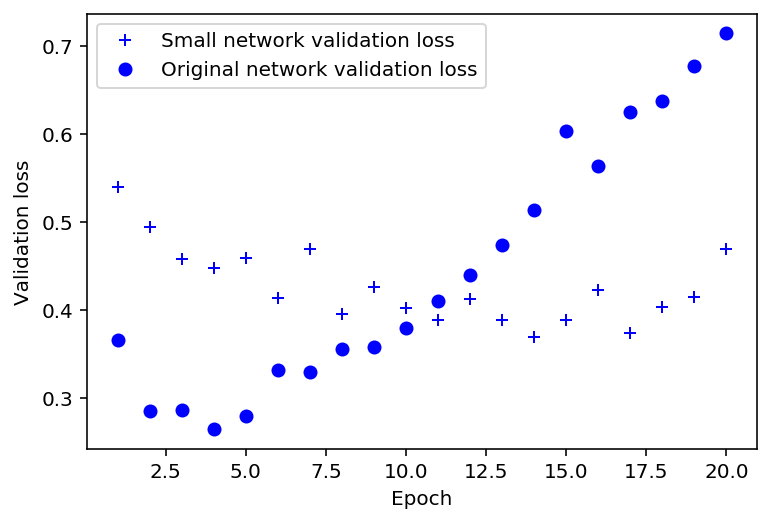

In [28]:
plt.plot(range(1, len(model1_val_loss) + 1), model1_val_loss, 'b+', label='Small network validation loss')
plt.plot(range(1, len(model2_val_loss) + 1), model2_val_loss, 'bo', label='Original network validation loss')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

The smaller network begins overfitting later in training than the original network. To benchmark, let's create a much larger network than necessary.

In [29]:
model3 = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [30]:
model3.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [31]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [32]:
history3 = model3.fit(imdb_xtrain,
                     imdb_ytrain,
                     epochs=20,
                     batch_size=512,
                     validation_data=(imdb_xval, imdb_yval))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 5s 253us/sample - loss: 0.4977 - accuracy: 0.7682 - val_loss: 0.4117 - val_accuracy: 0.8154
Epoch 2/20
20000/20000 [==============================] - 4s 207us/sample - loss: 0.2365 - accuracy: 0.9073 - val_loss: 0.2592 - val_accuracy: 0.8958
Epoch 3/20
20000/20000 [==============================] - 4s 205us/sample - loss: 0.1345 - accuracy: 0.9488 - val_loss: 0.3071 - val_accuracy: 0.8896
Epoch 4/20
20000/20000 [==============================] - 4s 207us/sample - loss: 0.0903 - accuracy: 0.9754 - val_loss: 0.3664 - val_accuracy: 0.8976
Epoch 5/20
20000/20000 [==============================] - 4s 207us/sample - loss: 0.0840 - accuracy: 0.9818 - val_loss: 0.3484 - val_accuracy: 0.8922
Epoch 6/20
20000/20000 [==============================] - 4s 192us/sample - loss: 0.0035 - accuracy: 0.9997 - val_loss: 0.5477 - val_accuracy: 0.8926
Epoch 7/20
20000/20000 [===========================

In [33]:
model3_val_loss = history3.history['val_loss']

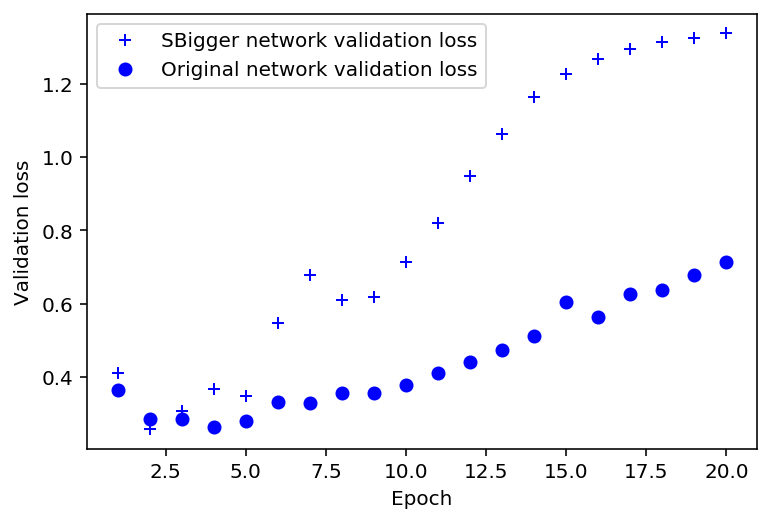

In [34]:
plt.plot(range(1, len(model3_val_loss) + 1), model3_val_loss, 'b+', label='SBigger network validation loss')
plt.plot(range(1, len(model2_val_loss) + 1), model2_val_loss, 'bo', label='Original network validation loss')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

The larger network begins overfitting basically after epoch 2. Meanwhile, for the training losses:

In [35]:
model3_train_loss = history3.history['loss']
model2_train_loss = history2.history['loss']

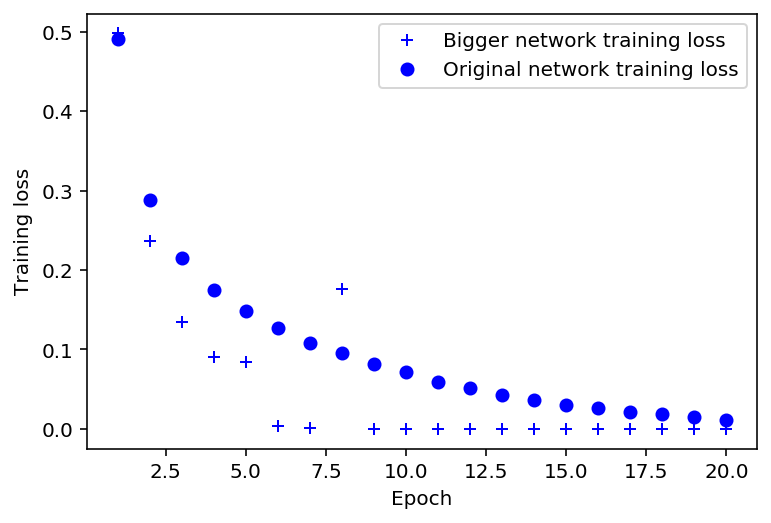

In [36]:
plt.plot(range(1, len(model3_train_loss) + 1), model3_train_loss, 'b+', label='Bigger network training loss')
plt.plot(range(1, len(model2_train_loss) + 1), model2_train_loss, 'bo', label='Original network training loss')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend()
plt.show()

The larger network drives its training loss to zero very quickly.

## Weight Regularization

This technique forces weights into taking on smaller values, thereby decreasing network entropy, by adding into the loss function a cost for having large weights. L1 regularization adds a cost proportional to the absolute value of the weight coefficients, and L2 adds a cost proportional to the square of the value of the weight coefficients. Let's add regularization to the network, noting that this will increase the loss. Since regularization only occurs during training, the training loss will be much higher than the test loss.

In [40]:
from tensorflow.keras import regularizers
model2_l2reg = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                      activation='relu', input_shape=(10000,)),
    keras.layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                      activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [41]:
model2_l2reg.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [42]:
history2_l2reg = model2_l2reg.fit(imdb_xtrain,
                     imdb_ytrain,
                     epochs=20,
                     batch_size=512,
                     validation_data=(imdb_xval, imdb_yval))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 100us/sample - loss: 0.5540 - accuracy: 0.7953 - val_loss: 0.4440 - val_accuracy: 0.8448
Epoch 2/20
20000/20000 [==============================] - 1s 45us/sample - loss: 0.3612 - accuracy: 0.8957 - val_loss: 0.3567 - val_accuracy: 0.8860
Epoch 3/20
20000/20000 [==============================] - 1s 44us/sample - loss: 0.2952 - accuracy: 0.9169 - val_loss: 0.3401 - val_accuracy: 0.8868
Epoch 4/20
20000/20000 [==============================] - 1s 45us/sample - loss: 0.2666 - accuracy: 0.9254 - val_loss: 0.3850 - val_accuracy: 0.8672
Epoch 5/20
20000/20000 [==============================] - 1s 45us/sample - loss: 0.2457 - accuracy: 0.9337 - val_loss: 0.3265 - val_accuracy: 0.8908
Epoch 6/20
20000/20000 [==============================] - 1s 45us/sample - loss: 0.2338 - accuracy: 0.9362 - val_loss: 0.3648 - val_accuracy: 0.8766
Epoch 7/20
20000/20000 [==============================] 

In [43]:
model2_l2reg_val_loss = history2_l2reg.history['val_loss']

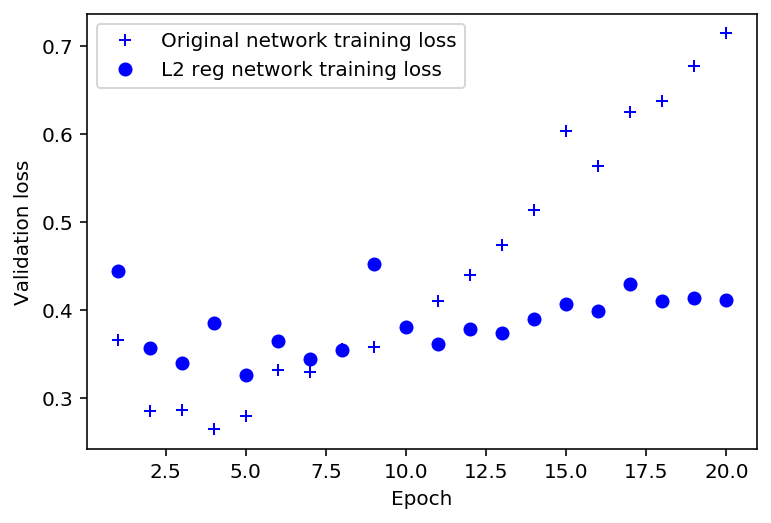

In [44]:
plt.plot(range(1, len(model2_val_loss) + 1), model2_val_loss, 'b+', label='Original network training loss')
plt.plot(range(1, len(model2_l2reg_val_loss) + 1), model2_l2reg_val_loss, 'bo', label='L2 reg network training loss')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

The model with regularization is much more resistant to overfitting than the model without.

## Dropout

Dropout zeroes-out the weights of randomly selected nodes at training time. The fraction of nodes that are dropped out during training is usually somewhere between 0.2 and 0.5. At testing time, the output must be scaled down by 1 - the dropout factor to account for the fact that there will be no dropped-out nodes.

Let's try the original network with dropout.

In [45]:
model2_dropout = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [46]:
model2_dropout.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [47]:
history2_dropout = model2_dropout.fit(imdb_xtrain, imdb_ytrain,
                                     epochs=20, batch_size=512,
                                     validation_data=(imdb_xval, imdb_yval))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 113us/sample - loss: 0.6135 - accuracy: 0.6564 - val_loss: 0.4646 - val_accuracy: 0.8636
Epoch 2/20
20000/20000 [==============================] - 1s 47us/sample - loss: 0.4787 - accuracy: 0.7750 - val_loss: 0.3743 - val_accuracy: 0.8824
Epoch 3/20
20000/20000 [==============================] - 1s 48us/sample - loss: 0.3995 - accuracy: 0.8289 - val_loss: 0.3087 - val_accuracy: 0.8896
Epoch 4/20
20000/20000 [==============================] - 1s 47us/sample - loss: 0.3445 - accuracy: 0.8611 - val_loss: 0.2762 - val_accuracy: 0.8936
Epoch 5/20
20000/20000 [==============================] - 1s 48us/sample - loss: 0.3056 - accuracy: 0.8854 - val_loss: 0.2801 - val_accuracy: 0.8884
Epoch 6/20
20000/20000 [==============================] - 1s 47us/sample - loss: 0.2650 - accuracy: 0.9047 - val_loss: 0.2703 - val_accuracy: 0.8938
Epoch 7/20
20000/20000 [==============================] 

In [48]:
model2_dropout_val_loss = history2_dropout.history['val_loss']

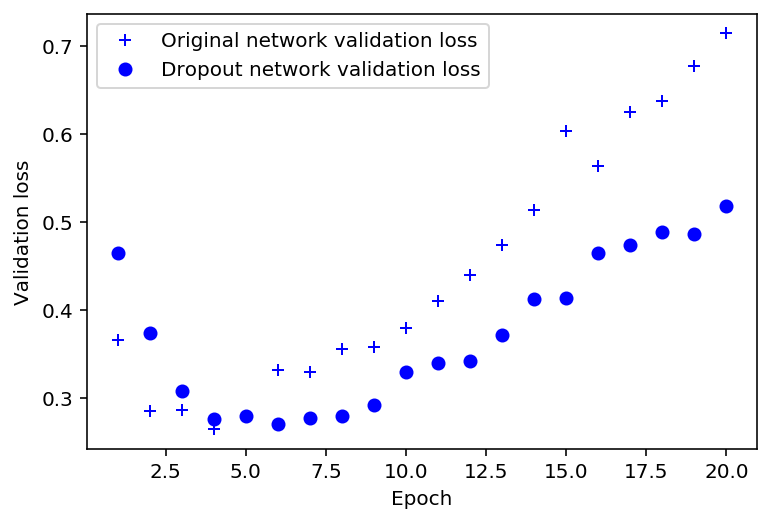

In [49]:
plt.plot(range(1, len(model2_val_loss) + 1), model2_val_loss, 'b+', label='Original network validation loss')
plt.plot(range(1, len(model2_dropout_val_loss) + 1), model2_dropout_val_loss, 'bo', label='Dropout network validation loss')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.legend()
plt.show()